
# INTRODUCTION

Here, I have performed complete EDA including data cleaning, mining, pre-processing and data analysis on the Google Merchandsie Store dataset.

## Table of contents

* [1. Loading libraries and data](#1.-Loading-libraries-and-data)

* [2. EDA](#2.-EDA)

  * [2.1 Missing data](#2.1-Missing-data)
  * [2.2 The response variable; transactionRevenue](#2.2-The-response-variable;-transactionRevenue)
  * [2.3 Time series and grouping by workday and by month](#2.3-Time-series-and-grouping-by-workday-and-by-month)
   * [2.3.1 Time series of sessions and revenues by Date](#2.3.1-Time-series-of-sessions-and-revenues-by-Date)
   * [2.3.2 Sessions and revenues by Workday](#2.3.2-Sessions-and-revenues-by-Workday)
   * [2.3.3 Sessions and revenues by Month](#2.3.3-Sessions-and-revenues-by-Month)
  * [2.4 Channel grouping and the source/medium dimension](#2.4-Channel-grouping-and-the-source/medium-dimension)
   * [2.4.1 Channel grouping](#2.4.1-Channel-grouping)
   * [2.4.2 The source/medium dimension](#2.4.2-The-source/medium-dimension)
  * [2.5 Operating system, browser and device category](#2.5-Operating-system,-browser-and-device-category)
   * [2.5.1 Device category](#2.5.1-Device-category)
   * [2.5.2 Operating system](#2.5.2-Operating-System)
   * [2.5.3 Browser](#2.5.3-Browser)
  * [2.6 Pageviews, Bounces and Hits](#2.6-Pageviews,-Bounces-and-Hits)
   * [2.6.1 Pageviews; all sessions.](#2.6.1-Pageviews;-all-sessions.)
   * [2.6.2 Pageviews; only sessions with any transaction revenue.](#2.6.2-Pageviews;-only-sessions-with-any-transaction-revenue.)
   * [2.6.3 Pageviews versus percent transactions](#2.6.3-Pageviews-versus-percent-transactions)
   * [2.6.4 Bounces](#2.6.4-Bounces)
   * [2.6.5 Hits](#2.6.5-Hits)
  * [2.7 Sessions, revenues and transactions by country](#2.7-Sessions,-revenues-and-transactions-by-country)


# 1. Loading libraries and data[](http://) 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
import json
import numpy as np
from pandas.io.json import json_normalize
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from plotnine import *
from plotnine.data import *

In [2]:
# Reading csv files and storing data in a dataframe
train = pd.read_csv("../train.csv")
test = pd.read_csv("../test.csv")

In [3]:
train.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


 Convert the JSON columns in the train and test sets into new dataframes to make a quick start

In [4]:
#JSON columns are "device", "geoNetwork", "totals", "trafficSource"

def load_df(csv_path):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}
                     )
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [221]:
#Combine to make the full training and test sets and remove temporary sets

In [5]:
train_df1 = load_df('../train.csv')
test_df1 = load_df('../test.csv')

Loaded train.csv. Shape: (903653, 55)
Loaded test.csv. Shape: (804684, 53)


In [ ]:
# storing loaded data to csv file
train_df1.to_csv('../featured_columns.csv')
test_df1.to_csv('../featured_columns_test.csv')

In [3]:
# Reading loaded csv files and storing data in new dataframe
new_train_df = pd.read_csv('../featured_columns.csv')
new_test_df = pd.read_csv('../featured_columns_test.csv')

In [ ]:
# Commands to reduce the no. of rows and cols of given dataframe and store it in other dataframe
# new_train_df = train_df1.iloc[0:350000]
# new_train_df.to_csv("/Users/Dharu/Desktop/SEM 1/ADS/Assignment2 - Google Analysis EDA/data/train1.csv", index=False, header=True)

# new_test_df = test_df1.iloc[0:350000]
# new_test_df.to_csv("/Users/Dharu/Desktop/SEM 1/ADS/Assignment2 - Google Analysis EDA/data/test1.csv", index=False, header=True)


In [222]:
train_df1.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not a

In [86]:
#already converting some character variables into factors
new_train_df[["channelGrouping","socialEngagementType","device.browser","device.operatingSystem","device.deviceCategory","geoNetwork.continent","geoNetwork.subContinent","geoNetwork.country","trafficSource.source","trafficSource.medium","trafficSource.keyword","trafficSource.referralPath","trafficSource.campaign"]] = new_train_df[["channelGrouping","socialEngagementType","device.browser","device.operatingSystem","device.deviceCategory","geoNetwork.continent","geoNetwork.subContinent","geoNetwork.country","trafficSource.source","trafficSource.medium","trafficSource.keyword","trafficSource.referralPath","trafficSource.campaign"]].astype('category')
new_test_df[["channelGrouping","socialEngagementType","device.browser","device.operatingSystem","device.deviceCategory","geoNetwork.continent","geoNetwork.subContinent","geoNetwork.country","trafficSource.source","trafficSource.medium","trafficSource.keyword","trafficSource.referralPath","trafficSource.campaign"]] = new_test_df[["channelGrouping","socialEngagementType","device.browser","device.operatingSystem","device.deviceCategory","geoNetwork.continent","geoNetwork.subContinent","geoNetwork.country","trafficSource.source","trafficSource.medium","trafficSource.keyword","trafficSource.referralPath","trafficSource.campaign"]].astype('category')


In [11]:
# converting the date variable to the date format
new_train_df['date'] = pd.to_datetime(new_train_df['date'],format='%Y%m%d', errors='coerce')
new_test_df['date'] = pd.to_datetime(new_test_df['date'],format='%Y%m%d', errors='coerce')


In [4]:
# converting character variables into numeric - "totals.visits", "totals.hits", "totals.bounces", "totals.pageviews", "totals.newVisits"
new_train_df['totals.visits'] = pd.to_numeric(new_train_df['totals.visits'], errors='coerce')
new_train_df['totals.hits'] = pd.to_numeric(new_train_df['totals.hits'], errors='coerce')
new_train_df['totals.bounces'] = pd.to_numeric(new_train_df['totals.bounces'], errors='coerce')
new_train_df['totals.pageviews'] = pd.to_numeric(new_train_df['totals.pageviews'], errors='coerce')
new_train_df['totals.newVisits'] = pd.to_numeric(new_train_df['totals.newVisits'], errors='coerce')
new_train_df['totals.transactionRevenue'] = pd.to_numeric(new_train_df['totals.transactionRevenue'], errors='coerce')

new_test_df['totals.visits'] = pd.to_numeric(new_test_df['totals.visits'], errors='coerce')
new_test_df['totals.hits'] = pd.to_numeric(new_test_df['totals.hits'], errors='coerce')
new_test_df['totals.bounces'] = pd.to_numeric(new_test_df['totals.bounces'], errors='coerce')
new_test_df['totals.pageviews'] = pd.to_numeric(new_test_df['totals.pageviews'], errors='coerce')
new_test_df['totals.newVisits'] = pd.to_numeric(new_test_df['totals.newVisits'], errors='coerce')


In [5]:
# converting visit start times to POSIXct
new_train_df['visitStartTime'] = pd.to_datetime(new_train_df['visitStartTime'], errors='coerce')
new_test_df['visitStartTime'] = pd.to_datetime(new_test_df['visitStartTime'], errors='coerce')

In [231]:
new_train_df.dtypes

channelGrouping                                            category
date                                                 datetime64[ns]
fullVisitorId                                                object
sessionId                                                    object
socialEngagementType                                       category
visitId                                                       int64
visitNumber                                                   int64
visitStartTime                                       datetime64[ns]
device.browser                                               object
device.browserSize                                           object
device.browserVersion                                        object
device.deviceCategory                                        object
device.flashVersion                                          object
device.isMobile                                                bool
device.language                                 

# 2. EDA[](http://) 

Below, you can see that we have over 900,000 observations in the train set. Each observation is in fact one visit to Gstore.

In [232]:
new_train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1970-01-01 00:00:01.472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1970-01-01 00:00:01.472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1970-01-01 00:00:01.472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1970-01-01 00:00:01.472881213,UC Browser,not ava

SessionId should be the unique identifier for each observation as it is a combination of fullVisitorId and visitId (which is basically the visitStartTime before I converted it to POSIXct). The number of unique sessionId's comes close to the total number of observations (903,653), but is 898 short.

In [233]:
new_train_df["sessionId"].nunique()
#new_train_df["sessionId"] = pd.unique(new_train_df.sessionId)

902755

 Let's see how we fare if I look at the sessionId's that are duplicate (n=2). As you can see this explains it perfectly! We have 129 sessionId's that appear exactly twice in the train set (898*2=1796). To do: see if I need to remove duplicate sessions, or possibly consolidate some numbers (number of pagehits, session duration etc.)

In [235]:
len(new_train_df[new_train_df["sessionId"].duplicated(keep=False)]["sessionId"])

1796

The test set has over 800,000 observations with two variables less (transactionRevenue and campaignCode).

In [236]:
new_test_df.shape

(804684, 53)

In [237]:
for col in new_train_df.columns:
    #for col_1 in new_test_df.columns:
        if col not in new_test_df.columns :
            print(col)

totals.transactionRevenue
trafficSource.campaignCode


## 2.1 Missing data

Altogether 14 variables in the train set contain missing values. Most of these variables seem related to adWords campaigns. The missing transactionRevenues must mean that there was no transaction.

In [403]:
list_of_col = new_train_df.columns[new_train_df.isna().any()].tolist()

In [404]:
list_of_col_count = new_train_df[list_of_col].isna().sum().sort_values(ascending=True)
#list_of_col_count
col_to_plot = pd.DataFrame(list_of_col_count,columns=['count'])

In [405]:
col_to_plot["PctMissing"] = round((col_to_plot['count']/len(new_train_df))*100,1)

In [406]:
col_to_plot

,count,PctMissing
totals.pageviews,100,0.0
totals.newVisits,200593,22.2
totals.bounces,453023,50.1
trafficSource.keyword,502929,55.7
trafficSource.referralPath,572712,63.4
trafficSource.isTrueDirect,629648,69.7
trafficSource.adwordsClickInfo.gclId,882092,97.6
trafficSource.adwordsClickInfo.adNetworkType,882193,97.6
trafficSource.adwordsClickInfo.isVideoAd,882193,97.6
trafficSource.adwordsClickInfo.page,882193,97.6


Text(0.5, 0, 'Percent missing')

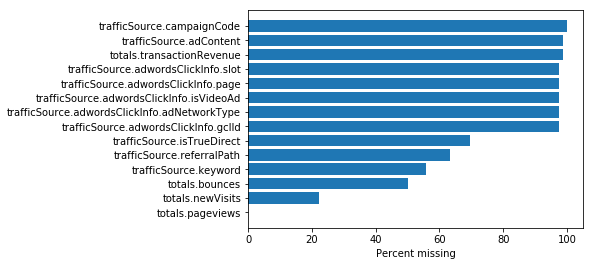

In [409]:
plt.barh(col_to_plot.index,col_to_plot['PctMissing'])
plt.xlabel("Percent missing")

## 2.2 The response variable; transactionRevenue

Only 11, 515 sessions in the train set led to a transaction. This is only 1.27% of the observations, and that of course matches with the 98.7% missing values in the previous section. Altogether, GStore had 1,5 million USD revenues in that year.

In [6]:
# setting missing values to zero

new_train_df['totals.transactionRevenue'] = new_train_df['totals.transactionRevenue'].fillna(0)

In [7]:
#correcting transaction revenues (see https://www.kaggle.com/c/google-analytics-customer-revenue-prediction/discussion/65775). 
#This is for EDA purposes only. In the competition, we need to predict the log of the tranaction values as they are stored in the dataset (so not divided by 1,000,000).
new_train_df['totals.transactionRevenue'] = new_train_df['totals.transactionRevenue']/1000000

In [8]:
tranRev = new_train_df[new_train_df['totals.transactionRevenue']>0]

In [9]:
d = { 'number of transactions': tranRev['totals.transactionRevenue'].count(), 'total revenues train set': tranRev['totals.transactionRevenue'].sum() }
pd.DataFrame(data=d,index = range(1))


,number of transactions,total revenues train set
0,11515,1540071.24


The range of revenues per transaction is from 1 dollarcent to 23,129.5 USD. Of the 11,515 transactions, 195 had revenues of at least 1,000 USD. The sum of revenues of this tail of big transactions is about 418,000 USD.

In [63]:
min(tranRev['totals.transactionRevenue'])

0.01

In [64]:
max(tranRev['totals.transactionRevenue'])

23129.5

In [65]:
tranRev['totals.transactionRevenue'].dtypes

dtype('float64')

In [10]:
newTranRev = tranRev[(tranRev['totals.transactionRevenue'] >= 1000)]

In [55]:
new_d = { 'number of transactions with at least 1000 USD revenues': newTranRev['totals.transactionRevenue'].count(), 'sum revenues of transactions with at least 1000 USD revenues': newTranRev['totals.transactionRevenue'].sum() }
pd.DataFrame(data = new_d,index = range(1))

,number of transactions with at least 1000 USD revenues,sum revenues of transactions with at least 1000 USD revenues
0,195,418588.31


As the distribution of revenues is very right skewed, with the tail reaching 23,000 USD, I am below only displaying the histogram of the transaction with revenues below 1,000 USD.

In [67]:
revenue_df = new_train_df[(new_train_df['totals.transactionRevenue']>0) & (new_train_df['totals.transactionRevenue']<1000)]

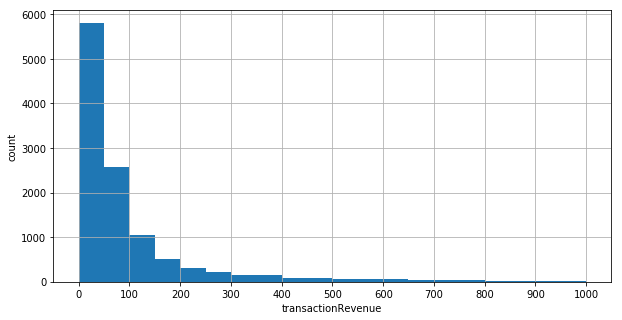

In [78]:
n_bins = 20

plt.figure(figsize=(10,5))
plt.hist(revenue_df['totals.transactionRevenue'],  bins=n_bins)
plt.xticks(np.arange(0,1100,100))
# plt.yticks(np.arange(0,2000,500))
plt.xlabel('transactionRevenue')
plt.ylabel('count')
plt.grid(True)
plt.show()

## 2.3 Time series and grouping by workday and by month
We have one year of train data (August 1, 2016-August 1, 2017), and 9 month of test data (August 2, 2017-April 30 2018).

In [12]:
min(new_train_df["date"])

Timestamp('2016-08-01 00:00:00')

In [384]:
max(new_train_df['date'])

Timestamp('2017-08-01 00:00:00')

In [385]:
min(new_train_df['date'])

Timestamp('2017-08-02 00:00:00')

In [386]:
max(new_train_df['date'])

Timestamp('2018-04-30 00:00:00')

### 2.3.1 Time series of sessions and revenues by Date
The number of daily sessions peaked in October and November 2016, but this did not lead to higher daily revenues. In the revenues plot,  we see daily revenues vary between 0 and about 27,000 USD and that there is no real revenues trend visible. In addition, we see some outliers with high daily revenues. For instance, the high daily revenue somewhere in the beginning of April 2017. Was there a special reason for this? Maybe there was a special event, or one very big transaction?

In [13]:
new_train_df.groupby('date')

In [14]:
dailySessions = new_train_df.groupby('date').count()

In [15]:
dailySessions

,Unnamed: 0,channelGrouping,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-01,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,728,1711,1238,1711,1711,1711,25,5,1711,5,5,5,5,1711,0,884,387,1711,700,1711
2016-08-02,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,962,2140,1656,2140,2140,2140,23,27,2140,27,27,27,27,2140,0,718,702,2140,975,2140
2016-08-03,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,1390,2890,2269,2889,2890,2890,16,52,2890,52,52,52,52,2890,0,837,957,2890,1342,2890
2016-08-04,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,1553,3161,2581,3160,3161,3161,8,39,3161,39,39,39,39,3161,0,882,880,3161,1434,3161
2016-08-05,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,1305,2702,2156,2702,2702,2702,9,29,2702,29,29,29,29,2702,0,756,845,2702,1230,2702
2016-08-06,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,1663,867,1663,1393,1662,1663,1663,10,51,1663,51,51,51,51,1663,0,370,621,1663,808,1663
2016-08-07,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,1622,874,1622,1346,1622,1622,1622,3,36,1622,36,36,36,36,1622,0,381,641,1622,727,1622
2016-08-08,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,2815,1292,2815,2100,2815,2815,2815,9,50,2815,50,50,50,50,2815,0,926,928,2815,1322,2815
2016-08-09,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851,1361,2851,2187,2850,2851,2851,10,41,2851,41,41,41,41,2851,0,924,934,2851,1344,2851


/Users/Dharu/anaconda3/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch clas

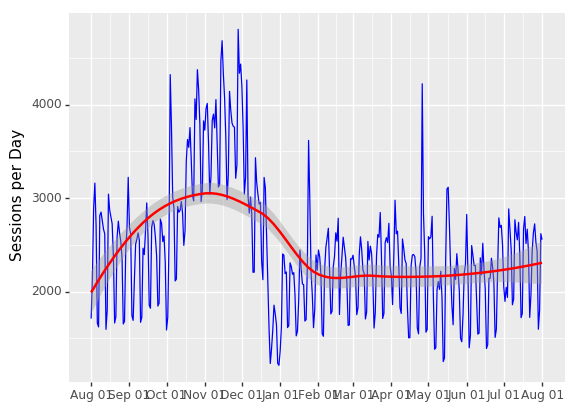

<ggplot: (-9223372029306026720)>

In [16]:
plt.rcParams["figure.figsize"] = "11, 8"
ggplot(dailySessions, aes(x='dailySessions.index', y='sessionId')) +\
geom_line(color='blue') +\
geom_smooth(color='red') +\
labs(x="", y="Sessions per Day") +\
scale_x_date(date_breaks = "1 month", date_labels = "%b %d")

In [17]:
new_train_df['date'] = pd.to_datetime(new_train_df['date'],format='%Y%m%d', errors='coerce')

In [18]:
new_train_df.groupby('date')

In [19]:
dailyRevenue = new_train_df.groupby('date').sum()

/Users/Dharu/anaconda3/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch clas

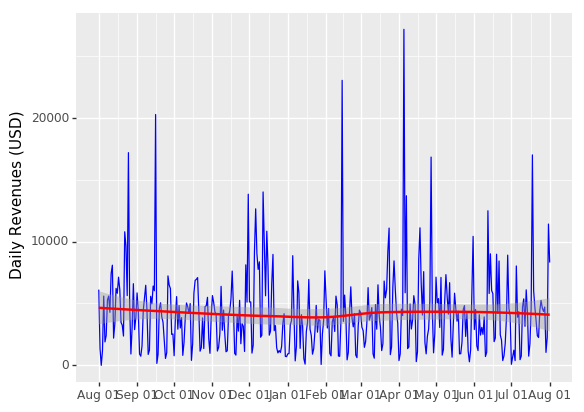

<ggplot: (7545376043)>

In [21]:
ggplot(dailyRevenue, aes(x='dailyRevenue.index', y='totals.transactionRevenue')) +\
geom_line(color='blue') +\
geom_smooth(color='red') +\
labs(x="", y="Daily Revenues (USD)") +\
scale_x_date(date_breaks = "1 month", date_labels = "%b %d")

## 2.3.2 Sessions and revenues by Workday

First of all, I am creating a new variable from the Date variable with the wday function of lubridate.

In [22]:
#train_df1['weekday'] = train_df1['date'].dt.dayofweek
new_train_df['weekday'] = new_train_df['date'].apply(lambda x: x.strftime('%a'))
new_train_df['weekday'] = new_train_df['date'].apply(lambda x: x.strftime('%a'))

In [88]:
new_train_df['weekday']

0         Fri
1         Fri
2         Fri
3         Fri
4         Fri
5         Fri
6         Fri
7         Fri
8         Fri
9         Fri
10        Fri
11        Fri
12        Fri
13        Fri
14        Fri
15        Fri
16        Fri
17        Fri
18        Fri
19        Fri
20        Fri
21        Fri
22        Fri
23        Fri
24        Fri
25        Fri
26        Fri
27        Fri
28        Fri
29        Fri
         ... 
903623    Wed
903624    Wed
903625    Wed
903626    Wed
903627    Wed
903628    Wed
903629    Wed
903630    Wed
903631    Wed
903632    Wed
903633    Wed
903634    Wed
903635    Wed
903636    Wed
903637    Wed
903638    Wed
903639    Wed
903640    Wed
903641    Wed
903642    Wed
903643    Wed
903644    Wed
903645    Wed
903646    Wed
903647    Wed
903648    Wed
903649    Wed
903650    Wed
903651    Wed
903652    Wed
Name: weekday, Length: 903653, dtype: object

The next thing that I am doing is that I create two functions that allow me to create barplots for all factor variables quickly.

In [89]:
#Note: I have not included reordering of x in this function. First of all, I don't want to reorder the workday and month plots.
#Second: Manual reordering gave me the opportunity to order the Revenues in the same order as first plot (descreasing sessions). See for instance Channel Grouping.
#The adjusted functions to display plots with flipped x and y (see section 2.4.2 the source/medium dimension) includes reordering.
new_train_df.groupby('weekday')

In [88]:
NoOfSessions = new_train_df.groupby('weekday').count()

In [273]:
#NoOfSessions.index = pd.Categorical(NoOfSessions.index, categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], ordered=True)
#sorter = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
#sorterIndex = dict(zip(sorter,range(len(sorter))))
#sorterIndex

{'Fri': 5, 'Mon': 1, 'Sat': 6, 'Sun': 0, 'Thu': 4, 'Tue': 2, 'Wed': 3}

In [89]:
NoOfSessions

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,month,transaction,ratioPageHits
weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fri,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,128331,98867,128317,128331,128331,1645,3243,128331,3246,3243,3243,3243,128331,0,39699,57247,128331,47021,128331,128331,128331,128317
Mon,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,140905,107562,140891,140905,140905,1494,2994,140905,2997,2994,2994,2994,140905,0,44950,60176,140905,52686,140905,140905,140905,140891
Sat,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,97646,80281,97634,97646,97646,1483,2784,97646,2790,2784,2784,2784,97646,0,25018,46307,97646,35765,97646,97646,97646,97634
Sun,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,100360,81383,100350,100360,100360,1495,2814,100360,2824,2814,2814,2814,100360,0,26367,47207,100360,37101,100360,100360,100360,100350
Thu,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,142399,109534,142386,142399,142399,1645,3286,142399,3293,3286,3286,3286,142399,0,43884,63007,142399,52119,142399,142399,142399,142386
Tue,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,147279,112584,147256,147279,147279,1400,3039,147279,3065,3039,3039,3039,147279,0,47103,63072,147279,53580,147279,147279,147279,147256
Wed,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,146733,112849,146719,146733,146733,1784,3300,146733,3346,3300,3300

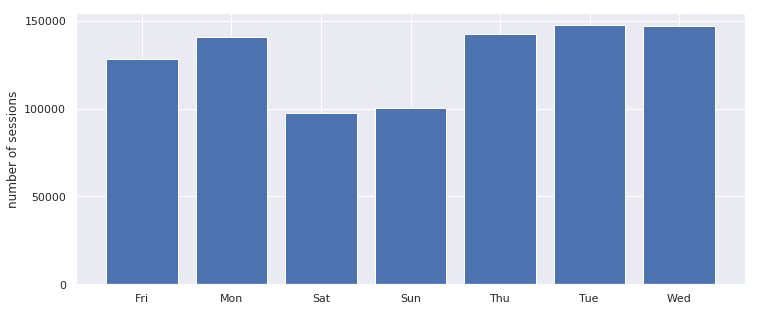

In [385]:
plt.figure(figsize=(12,5))
plt.bar(NoOfSessions.index, NoOfSessions['sessionId'], align='center')
plt.ylabel('number of sessions')

plt.yticks(np.arange(0, 200000, 50000))

plt.grid(True)
plt.show()

In [294]:
new_train_df.groupby('weekday')

In [92]:
Revenues = new_train_df.groupby('weekday')['totals.transactionRevenue'].sum()

In [93]:
Revenues

weekday
Fri    258656.66
Mon    272050.26
Sat     58397.36
Sun     75841.72
Thu    269170.56
Tue    307466.24
Wed    298488.44
Name: totals.transactionRevenue, dtype: float64

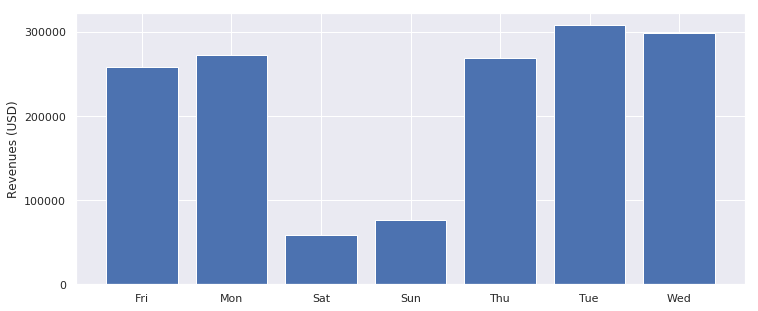

In [95]:
plt.figure(figsize=(12,5))
plt.bar(Revenues.index, Revenues, align='center')
plt.ylabel('Revenues (USD)')

plt.yticks(np.arange(0, 400000, 100000))

plt.grid(True)
plt.show()

## 2.3.3 Sessions and revenues by Month
Below, I am repeating the trick from the previous session for month. Patterns are less clear to me, but months seems to matter. For instance, April has a high ratio of revenues/sessions, and this ratio is low for November.

In [23]:
new_train_df['month'] = new_train_df['date'].apply(lambda x: x.strftime('%b'))
new_train_df['month'] = new_train_df['date'].apply(lambda x: x.strftime('%b'))

In [97]:
new_train_df['month']

0         Sep
1         Sep
2         Sep
3         Sep
4         Sep
5         Sep
6         Sep
7         Sep
8         Sep
9         Sep
10        Sep
11        Sep
12        Sep
13        Sep
14        Sep
15        Sep
16        Sep
17        Sep
18        Sep
19        Sep
20        Sep
21        Sep
22        Sep
23        Sep
24        Sep
25        Sep
26        Sep
27        Sep
28        Sep
29        Sep
         ... 
903623    Jan
903624    Jan
903625    Jan
903626    Jan
903627    Jan
903628    Jan
903629    Jan
903630    Jan
903631    Jan
903632    Jan
903633    Jan
903634    Jan
903635    Jan
903636    Jan
903637    Jan
903638    Jan
903639    Jan
903640    Jan
903641    Jan
903642    Jan
903643    Jan
903644    Jan
903645    Jan
903646    Jan
903647    Jan
903648    Jan
903649    Jan
903650    Jan
903651    Jan
903652    Jan
Name: month, Length: 903653, dtype: object

In [98]:
new_train_df.groupby('month')

In [99]:
NoOfSession = new_train_df.groupby('month').count()

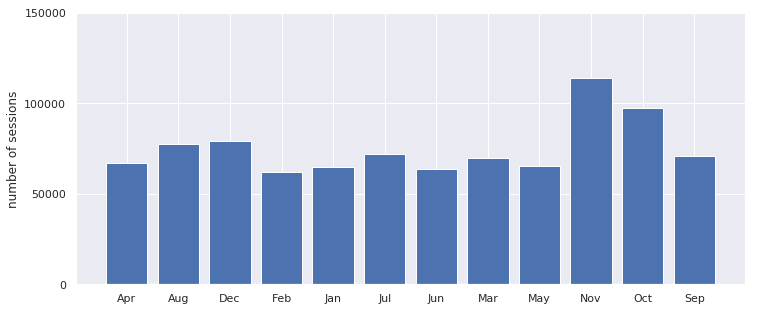

In [100]:
plt.figure(figsize=(12,5))
plt.bar(NoOfSession.index, NoOfSession['sessionId'], align = 'center')
plt.ylabel('number of sessions')

plt.yticks(np.arange(0, 200000, 50000))

plt.grid(True)
plt.show()

In [317]:
new_train_df.groupby('month')

In [101]:
Revenue = new_train_df.groupby('month')['totals.transactionRevenue'].sum()

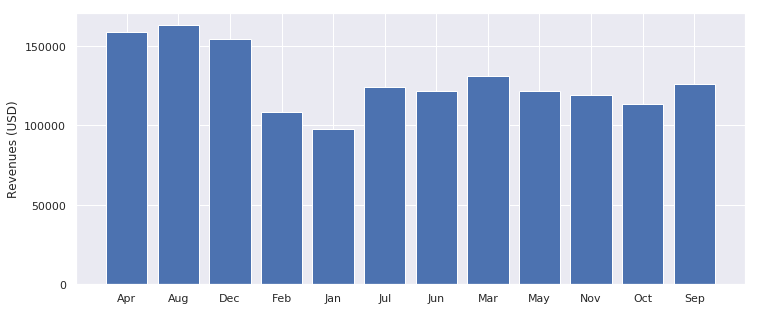

In [102]:
plt.figure(figsize=(12,5))
plt.bar(Revenue.index, Revenue, align='center')
plt.ylabel('Revenues (USD)')

plt.yticks(np.arange(0, 200000, 50000))

plt.grid(True)
plt.show()

## 2.4 Channel grouping and the source/medium dimension
### 2.4.1 Channel grouping
Channels define how users come to your website (Channel Groupings are rule-based groupings of your traffic sources). The default channel groupings can be found here. These groups are mostly defined by the Medium, and some also by Source, Social Source Referral or Ad Distribution Network. From Google Analytics:

Source: the origin of your traffic, such as a search engine (for example, google) or a domain (example.com).
Medium: the general category of the source, for example, organic search (organic), cost-per-click paid search (cpc), web referral (referral).
Examples:

Organic Search is defined by the medium only (Medium exactly matches organic).
Referral is also defined by the medium only (Medium exactly matches referral).
Social: Social Source Referral exactly matches Yes OR Medium matches regex ^(social|social-network|social-media|sm|social network|social media)$
Direct: Source exactly matches direct AND Medium exactly matches (not set) OR Medium exactly matches (none)
As you see in the plots, Organic Search and Social led to many sessions, but especially Social delivers hardly any revenues. Referral on the other hand delivers most revenues with a relatively small number of sessions.

In [103]:
new_train_df.groupby('channelGrouping')

In [104]:
NoOfSess = new_train_df.groupby('channelGrouping').count().sort_values(by='sessionId', ascending=False)

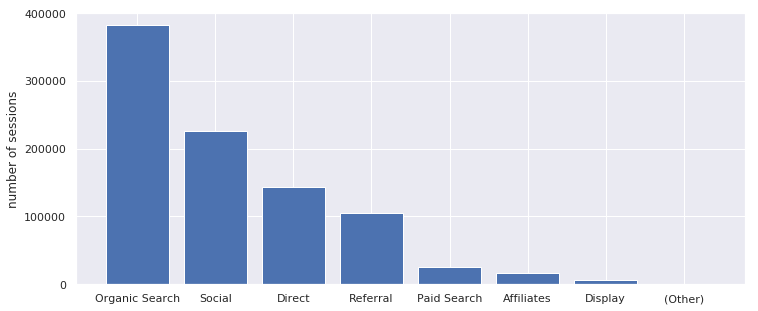

In [105]:
plt.figure(figsize=(12,5))
plt.bar(NoOfSess.index, NoOfSess['sessionId'], align='center', )
plt.ylabel('number of sessions')

plt.yticks(np.arange(0, 500000, 100000))

plt.grid(True)
plt.show()

In [106]:
Rev = new_train_df.groupby('channelGrouping')['totals.transactionRevenue'].sum()

In [107]:
sortedRev = Rev.sort_values(ascending=False)

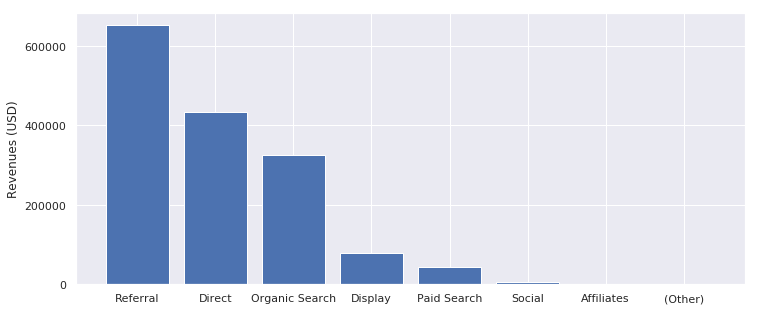

In [110]:
plt.figure(figsize=(12,5))
plt.bar(sortedRev.index, sortedRev, align='center')
plt.ylabel('Revenues (USD)')

plt.yticks(np.arange(0, 800000, 200000))

plt.grid(True)
plt.show()

### 2.4.2 The source/medium dimension
Source/Medium is a dimension that combines the dimensions Source and Medium. Examples of Source/Medium include google/organic, example.com/referral, and newsletter9-2014/email.

As I now wanted to flip the axis, I adjusted the plot functions first in the code below.

In [111]:
new_train_df['trafficSource.source'] = new_train_df['trafficSource.source'].astype('str')
new_train_df['trafficSource.medium'] = new_train_df['trafficSource.medium'].astype('str')

In [112]:
new_train_df['sourceMedium'] = new_train_df['trafficSource.source'] + '/' + new_train_df['trafficSource.medium']

In [113]:
new_train_df.groupby('sourceMedium')

In [513]:
NoOfSes = new_train_df.groupby('sourceMedium').count().sort_values(by='sessionId', ascending=True).tail(20)

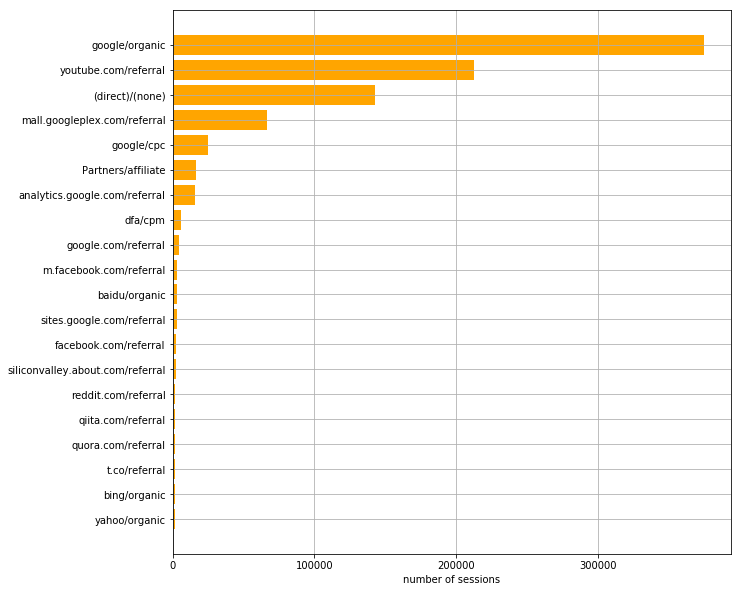

In [514]:
plt.figure(figsize=(10,10))
plt.barh(NoOfSes.index, NoOfSes['sessionId'], align = 'center', color = 'orange')
plt.xlabel('number of sessions')

plt.xticks(np.arange(0, 400000, 100000))

plt.grid(True)
plt.show()

In [114]:
Revenues = new_train_df.groupby('sourceMedium')['totals.transactionRevenue'].sum()

In [115]:
sortedRevenues = Revenues.sort_values(ascending=True).tail(20)

In [116]:
sortedRevenues

sourceMedium
google.com/referral                      347.24
siliconvalley.about.com/referral         377.22
mg.mail.yahoo.com/referral               377.31
connect.googleforwork.com/referral       404.81
Partners/affiliate                       597.38
bing/organic                             987.72
l.facebook.com/referral                 1043.72
facebook.com/referral                   1137.67
yahoo/organic                           1374.96
google/cpm                              1409.04
groups.google.com/referral              1631.26
gdeals.googleplex.com/referral          2175.54
sites.google.com/referral               4390.78
dealspotr.com/referral                  5690.64
mail.google.com/referral               23327.91
google/cpc                             43558.90
dfa/cpm                                76928.42
google/organic                        323987.43
(direct)/(none)                       434840.55
mall.googleplex.com/referral          612968.03
Name: totals.transactionRev

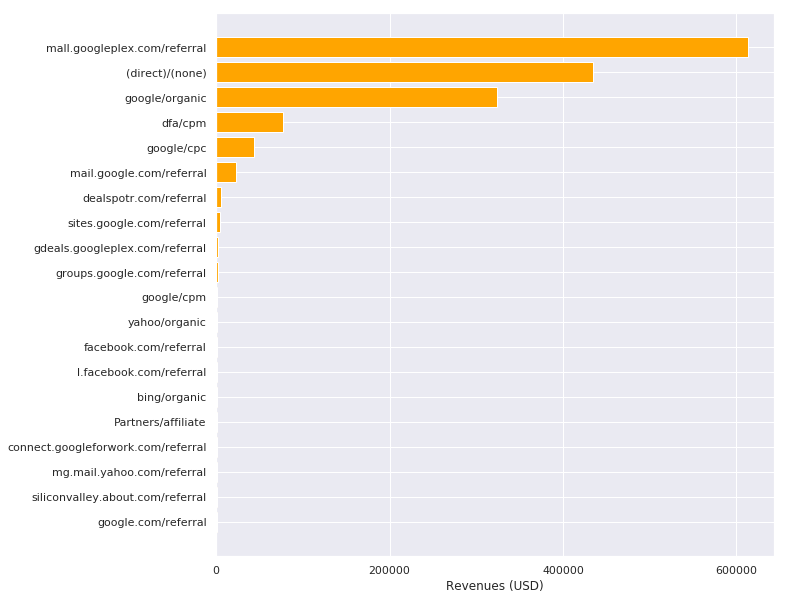

In [118]:
plt.figure(figsize=(10,10))
plt.barh(sortedRevenues.index, sortedRevenues, align = 'center', color = 'orange')

plt.xlabel('Revenues (USD)')

plt.xticks(np.arange(0, 800000, 200000))

plt.grid(True)
plt.show()

## 2.5 Operating system, browser and device category
### 2.5.1 Device category
The main takeaway here is that mobile and tablet have a lot fewer sessions, and relatively low revenues per session when compared to desktop.

In [90]:
# function to see impact of feature on transaction revenue
def revenue(feature, palette,  sum_values = True ):
    
    # condition for sum values
    temp = new_train_df[new_train_df["totals.transactionRevenue"].notnull()]
    if sum_values :
        temp.groupby(by = feature)["totals.transactionRevenue"].sum().tail(20)
    else:
        temp.groupby(by = feature)["totals.transactionRevenue"].mean()
        
    temp = temp.reset_index().sort_values('totals.transactionRevenue', ascending=False)
    
    temp = temp[temp['totals.transactionRevenue'] > 0]
    plt.figure(figsize=(15,5))
    #plt.title("Revenue impact of the {} on transaction revenue".format(feature))
    ax = sns.barplot(y = temp['totals.transactionRevenue'], x = temp[feature], orient='v', palette=palette)

In [91]:
# function to see the number of sessions for each feature
def session(feature, palette):
    temporary = new_train_df.groupby(by = feature).count().sort_values(by='sessionId', ascending=False).tail(20)
    
    plt.figure(figsize=(15,5))
    ax = sns.barplot(y = temporary['sessionId'], x = temporary.index, orient='v', palette=palette)
    plt.ylabel("number of sessions")
    plt.yticks(np.arange(0, 800000, 200000))

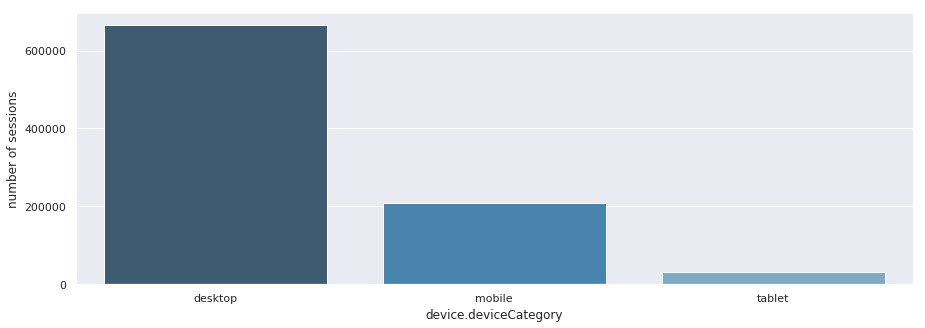

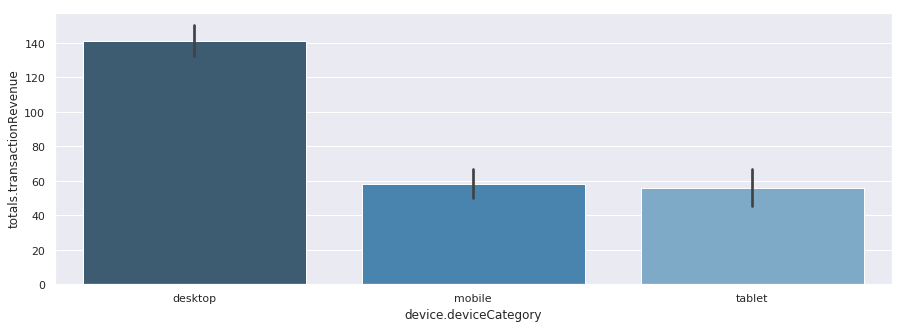

In [92]:
session(feature='device.deviceCategory', palette="Blues_d")
revenue(feature='device.deviceCategory', palette="Blues_d", sum_values=True)

### 2.5.2 Operating System
Since there are only 7 Operating Systems with revenues, I am only displaying those. Actually, (not set) had slightly more sessions than Windows Phone, but since (not set) is pretty meaningless and (not set) had no revenues anyway, I excluded (not set) from the first plot.

What stands out is Macintosh had much higher revenues than Windows with fewer sessions. In addition, it also confirms again that the mobile sessions (Android and iOS) have little revenues compared to the number of sessions.

In [12]:
# train_df1['device.operatingSystem']= train_df1['device.operatingSystem'].apply(lambda x: x!=('(not set)')) -> converts column vaslues to boolean so donot use
deviceOS = new_train_df[new_train_df['device.operatingSystem']!= '(not set)']

In [13]:
deviceOS

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1970-01-01 00:00:01.472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1970-01-01 00:00:01.472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1970-01-01 00:00:01.472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1970-01-01 00:00:01.472881213,UC Brow

In [14]:
deviceOS.groupby('device.operatingSystem')

In [21]:
count = deviceOS.groupby('device.operatingSystem').count().sort_values(by='sessionId', ascending=False).head(7)

In [22]:
count

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
device.operatingSystem,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Windows,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,350072,195873,350072,291462,350032,2309,350072,2652,5266,350072,5300,5266,5266,5266,350072,0,78603,149841,350072,146202,350072
Macintosh,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,253938,108059,253938,182126,253893,6426,253938,1748,4769,253938,4808,4769,4769,4769,253938,1,81937,83899,253938,128026,253938
Android,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,123892,65498,123892,98074,123882,467,123892,3123,5064,123892,5082,5064,5064,5064,123892,0,48510,68211,123892,20357,123892
iOS,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,107665,53407,107665,84634,107663,536,107665,3021,5284,107665,5293,5284,5284,5284,107665,0,36052,76761,107665,8791,107665
Linux,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,35034,13835,35034,23896,35033,782,35034,80,157,35034,157,157,157,157,35034,0,15445,7576,35034,16629,35034
Chrome OS,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,26337,9672,26337,16711,26336,994,26337,313,912,26337,913,912,912,912,26337,0,11200,12848,26337,7756,26337
Windows Phone,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,733,1216,1024,1216,1,1216,2,5,1216,5,5,5,5,1216,0,348,526,1216,456,1216


([<matplotlib.axis.YTick at 0x17d937ced30>,
 <a list of 4 Text yticklabel objects>)

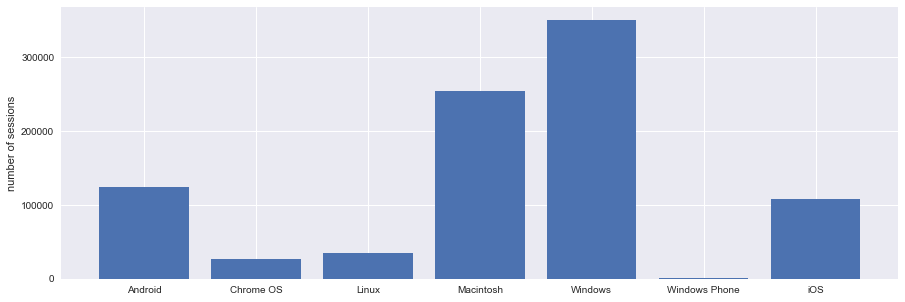

In [23]:
plt.figure(figsize=(15,5))
plt.bar(count.index, count['sessionId'], align = 'center')
plt.ylabel("number of sessions")
plt.yticks(np.arange(0, 400000, 100000))

### 2.5.3 Browser
While the first plot displays the top10 browsers with most sessions (n=10 is the default in the function), the second plot only displays 9 browsers as there were only 9 browsers with revenues. By far the most sessions and revenues come from the Chrome browser. Firefox also has a healthy balance between sessions and revenue. Safari has a lot of sessions with relatively low revenues.

In [166]:
new_train_df.groupby('device.browser')

In [583]:
NoOfSes = new_train_df.groupby('device.browser').count().sort_values(by='sessionId', ascending=True).tail(10)

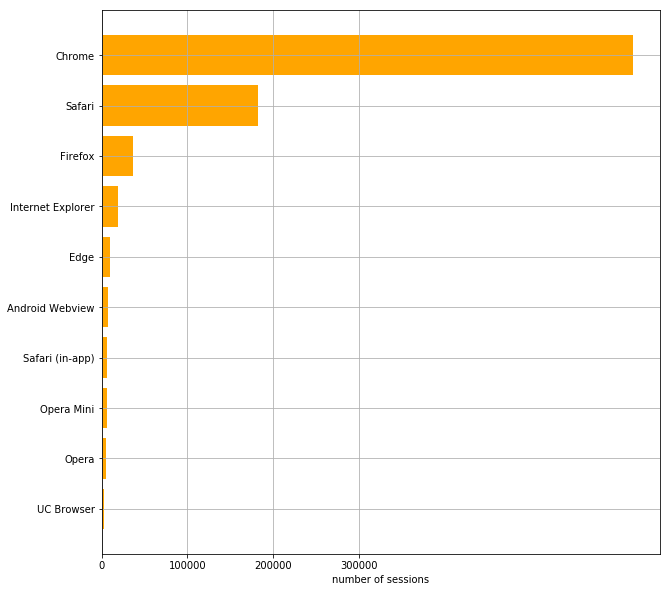

In [586]:
plt.figure(figsize=(10,10))
plt.barh(NoOfSes.index, NoOfSes['sessionId'], align = 'center', color = 'orange')
plt.xlabel('number of sessions')

plt.xticks(np.arange(0, 400000, 100000))

plt.grid(True)
plt.show()

In [167]:
Revenues = new_train_df.groupby('device.browser')['totals.transactionRevenue'].sum()

In [168]:
sortedRevenues = Revenues.sort_values(ascending=True).tail(10)

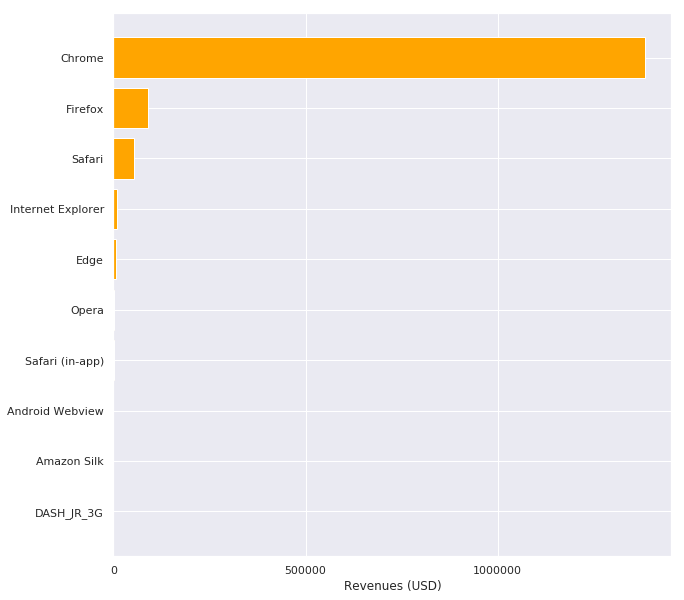

In [170]:
plt.figure(figsize=(10,10))
plt.barh(sortedRevenues.index, sortedRevenues, align = 'center', color = 'orange')

plt.xlabel('Revenues (USD)')

plt.xticks(np.arange(0, 1500000, 500000))

plt.grid(True)
plt.show()

## 2.6 Pageviews, Bounces and Hits
### 2.6.1 Pageviews; all sessions.
A pageview is each time a visitor views a page on your website, regardless of how many hits are generated.

The distribution of pageviews is very right skewed. However, the second graph shows that most revenues come from (small) numbers of sessions with lots of pageviews!

In [24]:
pageviews = new_train_df[(new_train_df['totals.pageviews'].notnull()) & (new_train_df['totals.pageviews']<28)]

In [25]:
pageviews

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1970-01-01 00:00:01.472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1970-01-01 00:00:01.472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1970-01-01 00:00:01.472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1970-01-01 00:00:01.472881213,UC Brow

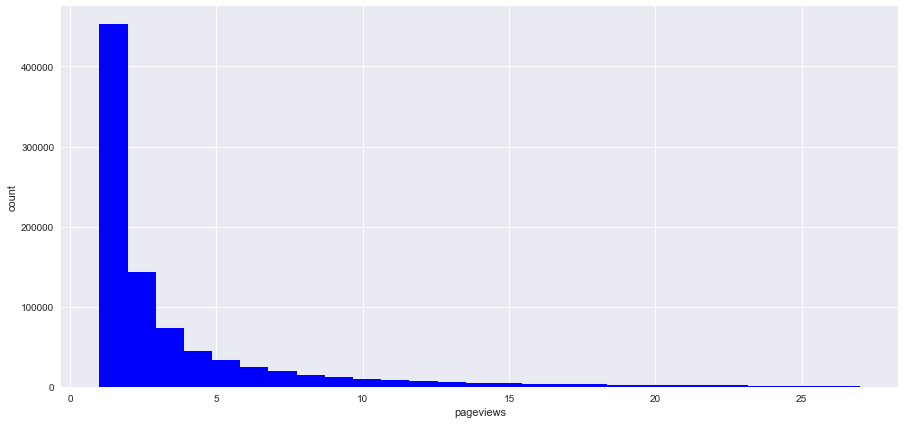

In [30]:
plt.figure(figsize=(15,7))
plt.hist(pageviews['totals.pageviews'], bins=27, color = "blue", lw=0)
plt.xlabel('pageviews')
plt.ylabel('count')
plt.grid(True)
plt.show()

In [182]:
pageviews.groupby('totals.pageviews')

In [183]:
RevenueSum = pageviews.groupby('totals.pageviews')['totals.transactionRevenue'].sum()

In [184]:
RevenueSum

totals.pageviews
1.0         0.00
2.0      1214.50
3.0       211.18
4.0       994.30
5.0      2717.94
6.0       335.51
7.0      1555.71
8.0      8490.44
9.0     14481.07
10.0    24024.95
11.0    37492.29
12.0    26888.59
13.0    42635.38
14.0    49535.87
15.0    40426.75
16.0    41423.17
17.0    40509.51
18.0    37637.41
19.0    28747.32
20.0    35544.60
21.0    39831.05
22.0    50568.12
23.0    41056.32
24.0    39805.42
25.0    28989.72
26.0    44145.58
27.0    32158.26
Name: totals.transactionRevenue, dtype: float64

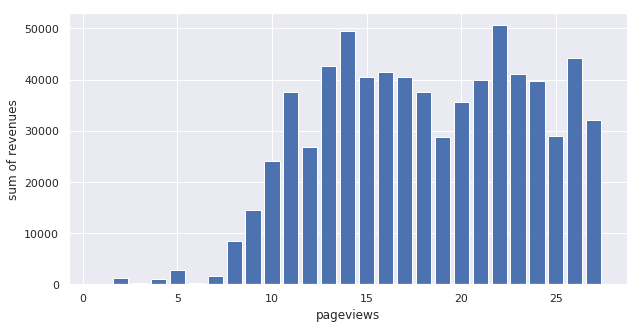

In [185]:
plt.figure(figsize=(10,5))
plt.bar(RevenueSum.index, RevenueSum, align = 'center')
plt.xlabel('pageviews')
plt.ylabel('sum of revenues')
plt.yticks(np.arange(0,60000,10000))
plt.grid(True)
plt.show()

Below, I am taking the mean of the revenues per session for each pageview 'category'. For the mean, we are getting some decent numbers. Not surprsingly, the medain is 0 for all those pageview categories.

In [186]:
RevenueMean = pageviews.groupby('totals.pageviews')['totals.transactionRevenue'].mean()

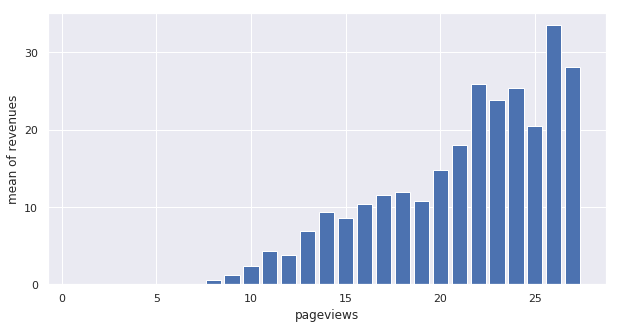

In [187]:
plt.figure(figsize=(10,5))
plt.bar(RevenueMean.index, RevenueMean, align = 'center')
plt.xlabel('pageviews')
plt.ylabel('mean of revenues')
plt.yticks(np.arange(0,40,10))
plt.grid(True)
plt.show()

In [188]:
RevenueMedian = pageviews.groupby('totals.pageviews')['totals.transactionRevenue'].median()

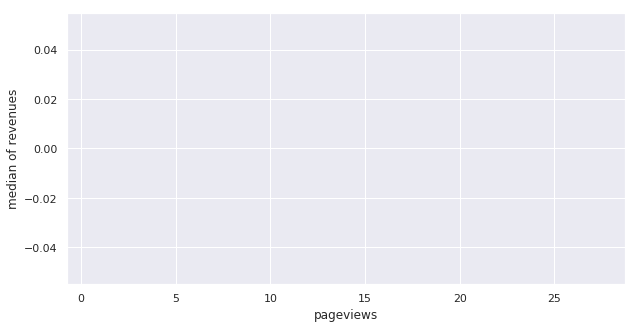

In [191]:
plt.figure(figsize=(10,5))
plt.bar(RevenueMedian.index, RevenueMedian, align = 'center')
plt.xlabel('pageviews')
plt.ylabel('median of revenues')
plt.grid(True)
plt.show()

### 2.6.2 Pageviews; only sessions with any transaction revenue.
Below I displaying the histogram of pageviews with revenues. This mean that we are only looking at the 11,515 sessions with revenues. This paints a very different picture!

In [31]:
pages = new_train_df[(new_train_df['totals.pageviews'].notnull()) & (new_train_df['totals.pageviews']<=28) & (new_train_df['totals.transactionRevenue']>0)]

In [32]:
pages

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
752,752,Direct,20160902,6194193421514403509,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1970-01-01 00:00:01.472843572,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,not available in demo dataset,not available in demo dataset,Ann Arbor,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,Detroit MI,(not set),not available in demo dataset,Michigan,Northern America,NaN,11,1.0,11.0,37860000.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)
753,753,Organic Search,20160902,5327166854580374902,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1970-01-01 00:00:01.472844906,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,New York,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,New York NY,(not set),not available in demo dataset,New York,Northern America,NaN,11,NaN,10.0,306670000.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google
799,799,Referral,20160902,8885051388942907862,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1970-01-01 00:00:01.472827393,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,not available in demo dataset,not available in demo dataset,New York,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,New York NY,(not set),not available in demo dataset,New York,Northern America,NaN,13,NaN,11.0,68030000.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,True,NaN,referral,/,mall.googleplex.com
802,802,Referral,20160902,185467632009737931,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1970-01-01 00:00:01.472846398,Chrome,not available in dem

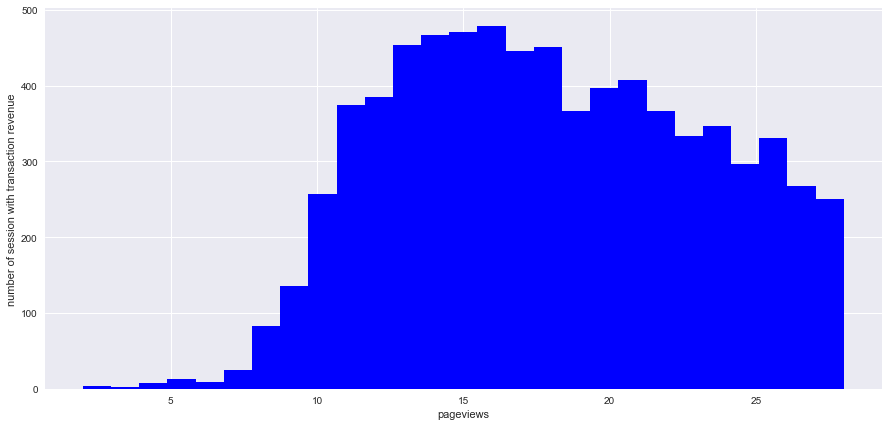

In [34]:
plt.figure(figsize=(15,7))
plt.hist(pages['totals.pageviews'], bins=27, color = "blue", lw=0)
plt.xlabel('pageviews')
plt.ylabel('number of session with transaction revenue')
plt.grid(True)
plt.show()

I am now adding transactionRevenue>0 to the filter, and display the mean and median revenues of the sessions with some transaction revenue only. It would say that let's say the mean and median of the categories up-to 7 pageviews are very unreliable as these are based on only 0-25 transactions (of large numbers of sessions).

In [210]:
RevMean = pages.groupby('totals.pageviews')['totals.transactionRevenue'].mean()

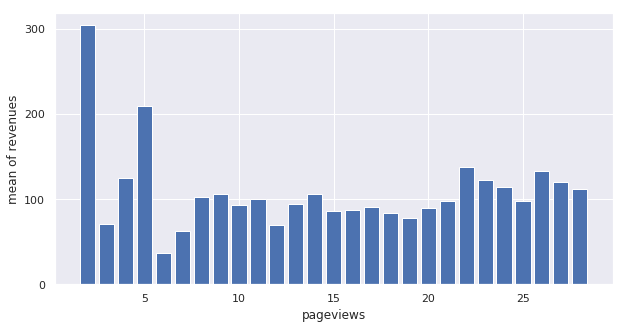

In [221]:
plt.figure(figsize=(10,5))
plt.bar(RevMean.index, RevMean, align = 'center')
plt.xlabel('pageviews')
plt.ylabel('mean of revenues')
plt.yticks(np.arange(0,400,100))
plt.grid(True)
plt.show()

In [215]:
RevMedian = pages.groupby('totals.pageviews')['totals.transactionRevenue'].median()

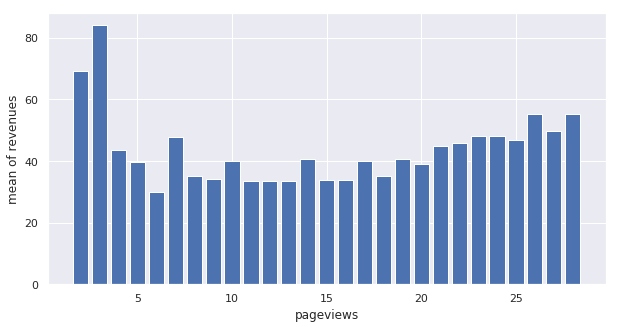

In [216]:
plt.figure(figsize=(10,5))
plt.bar(RevMedian.index, RevMedian, align = 'center')
plt.xlabel('pageviews')
plt.ylabel('mean of revenues')
plt.yticks(np.arange(0,100,20))
plt.grid(True)
plt.show()

### 2.6.3 Pageviews versus percent transactions
After having made all these revenue-related plots, a last thing that I wanted to figure out was the percent of transaction (regardless of the transaction revenue amount) for each category of pageviews. All sessions with less than 7 pageviews led to zero or a negligable percent of transactions! As you can see, there seems to be a correlation but only among pageviews of let's say at least 7-40/50 pageviews. Above 40/50 pageviews the percent transactions remain flat.

In [24]:
new_train_df['transaction'] = ""

In [35]:
#%%time
#for i in range(len(train_df1)):
#    if train_df1["totals.transactionRevenue"][i] > 0:
#        train_df1["transaction"][i] = 1
#    else: 
#        train_df1["transaction"][i] = 0

In [36]:
pages_100 = new_train_df[(new_train_df['totals.pageviews'].notnull()) & (new_train_df['totals.pageviews']<=100)]

In [37]:
pages_100

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,weekday,month,transaction
0,0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1970-01-01 00:00:01.472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1.0,1,1.0,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,Fri,Sep,
1,1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1970-01-01 00:00:01.472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1.0,1,1.0,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,Fri,Sep,
2,2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1970-01-01 00:00:01.472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,Fri,Sep,
3,3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Social

In [38]:
pages_100 = pages_100.rename(columns = {'totals.transactionRevenue':'transactionRevenue'})

In [39]:
pages_100.loc[pages_100.transactionRevenue > 0, 'transaction'] = 1
pages_100.loc[pages_100.transactionRevenue == 0, 'transaction'] = 0

In [40]:
pages_100['transaction'] = pages_100['transaction'].astype('int64')

In [41]:
pct_pages_sessions = pages_100.groupby('totals.pageviews').count()


In [42]:
pct_pages = pages_100.groupby('totals.pageviews').sum()

In [43]:
pct_pages['pct_change'] = round(pct_pages['transaction']/(pct_pages_sessions['sessionId'])*100,1)

/Users/Dharu/anaconda3/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch clas

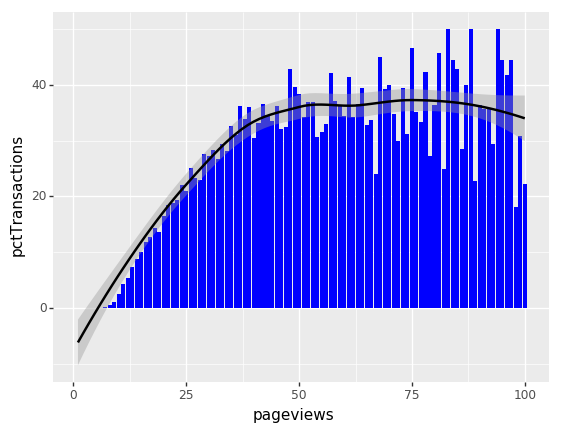

<ggplot: (-9223372029309396904)>

In [69]:
ggplot(pct_pages, aes(x='pct_pages.index', y='pct_change')) +\
geom_bar(stat='identity', fill='blue') +\
geom_smooth() +\
labs(x="pageviews", y="pctTransactions")

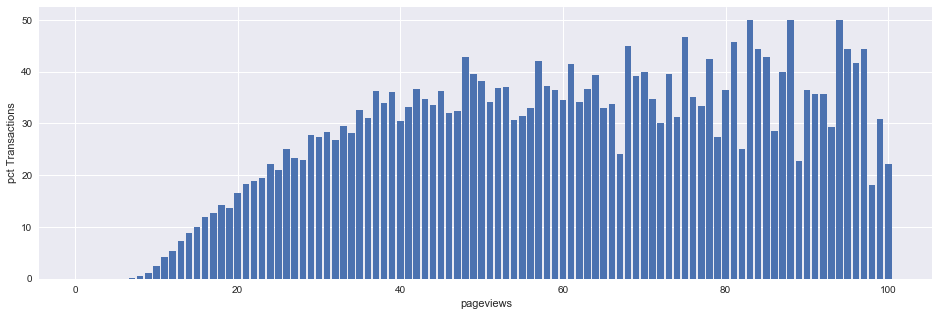

In [93]:
# above graph plotted using matplotlib
plt.figure(figsize=(16,5))
plt.bar(pct_pages.index,pct_pages['pct_change'])
plt.ylabel('pct Transactions')
plt.xlabel('pageviews')
plt.show()

### 2.6.4 Bounces

>A bounce is a single-page session on your site.

Since a bounce is the same as a 'one pageview session'. Therefore, I am just checking if these numbers match.

In [50]:
new_train_df['totals.bounces'] = new_train_df['totals.bounces'].fillna(0)

In [51]:
new_train_df['totals.bounces'] = new_train_df['totals.bounces'].fillna(0)

In [52]:
bounces = new_train_df[new_train_df['totals.bounces'] == 1]

In [53]:
bounces

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,weekday,month,transaction
0,0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1970-01-01 00:00:01.472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1.0,1,1.0,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,Fri,Sep,
1,1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1970-01-01 00:00:01.472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1.0,1,1.0,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,Fri,Sep,
2,2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1970-01-01 00:00:01.472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,Fri,Sep,
3,3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Social

In [54]:
bounces_calc = {'number of bounces' : bounces['totals.bounces'].count(), 'revenue bounce session' : bounces['totals.transactionRevenue'].sum()}

In [55]:
pd.DataFrame(data = bounces_calc, index = range(1))

,number of bounces,revenue bounce session
0,450630,0.0


So we have 450,630 bounces. However, below you can see that we have 452,522 sessions with 1 pageview. This number should be the same! 

As a bounce is a 1-page session, it should never have any revenues (A transaction needs at least 2 pageviews: first you would have to select a product, then move on to a page on which you can pay). Above, you can see that this is correct for all sessions that are labeled as a bounce. However, you can see that the zero revenues are also correct for the 452,522 sessions with pageviews==1. Therefore, I think we can fix this discrepancy with setting all those 1-page session to bounce==1.

In [56]:
pageviews = new_train_df[new_train_df['totals.pageviews'] == 1]

In [57]:
pageviews

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,weekday,month,transaction
0,0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1970-01-01 00:00:01.472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1.0,1,1.0,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,Fri,Sep,
1,1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1970-01-01 00:00:01.472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1.0,1,1.0,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,Fri,Sep,
2,2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1970-01-01 00:00:01.472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,0.0,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google,Fri,Sep,
3,3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Social

In [58]:
pageviews_calc = {'number of 1-page sessions' : pageviews['totals.pageviews'].count(), 'revenues 1-page session' : pageviews['totals.transactionRevenue'].sum()}

In [59]:
pd.DataFrame(data = pageviews_calc, index = range(1))

,number of 1-page sessions,revenues 1-page session
0,452522,0.0


### 2.6.5 Hits
The first definition that I found was:

>Hit: Pages are comprised of files. For example, if you have a page with 10 pictures, then a request to a server to view that page generates 11 hits (10 for the pictures, and one for the html file).

That did not sound as a reliable predictor to me. However, there was an interesting finding in this discussion topic: [Finding - Pageviews/Hits ratio <0.4 guarantees no revenue](https://www.kaggle.com/c/ga-customer-revenue-prediction/discussion/66774). I was pointed to another definition:

>Hit: An interaction that results in data being sent to Analytics. Common hit types include page tracking hits, event tracking hits, and ecommerce hits. Each time the tracking code is triggered by a user’s behavior (for example, user loads a page on a website or a screen in a mobile app), Analytics records that activity. Each interaction is packaged into a hit and sent to Google’s servers. Examples of hit types include: page tracking hits, event tracking hits, ecommerce tracking hits, social interaction hits.

This made me believe that I should look at hits after all. The graph below shows a pattern that is very similar to the one of pageviews (no transactions for very few hits/pages, a correlation from x to y, and flat after that). Therefore, looking at the pageviews/hits ratio seems a good idea to me indeed! The second graph confirms the finding in the discussion topic (please notice that I have zoomed-in a lot make small amounts more visible)!

In [61]:
new_hits = new_train_df[new_train_df['totals.hits'] <= 200]

In [62]:
new_hits=new_hits.rename(columns = {'totals.transactionRevenue':'transactionRevenue'})

In [63]:
new_hits.loc[new_hits.transactionRevenue > 0, 'transaction'] = 1
new_hits.loc[new_hits.transactionRevenue == 0, 'transaction'] = 0

In [64]:
new_hits['transaction'] = new_hits['transaction'].astype('int64')

In [65]:
hits_count = new_hits.groupby('totals.hits').count()

In [66]:
transaction_sum = new_hits.groupby('totals.hits').sum()

In [67]:
transaction_sum['pct_change'] = round(transaction_sum['transaction']/(hits_count['sessionId'])*100,1)

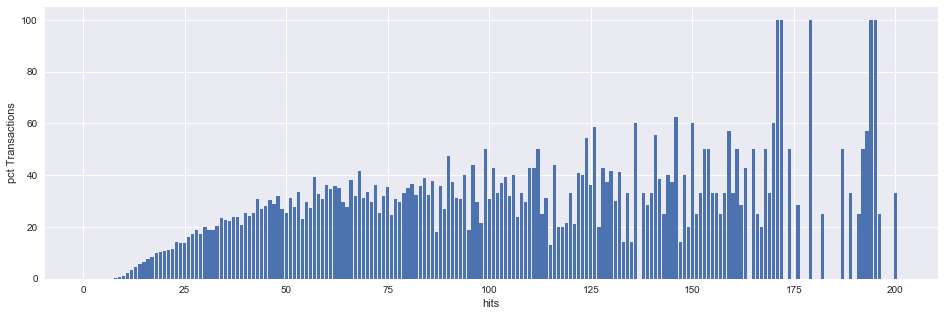

In [124]:
plt.figure(figsize=(16,5))
plt.bar(transaction_sum.index,transaction_sum['pct_change'])
plt.ylabel('pct Transactions')
plt.xlabel('hits')
plt.show()

/Users/Dharu/anaconda3/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch clas

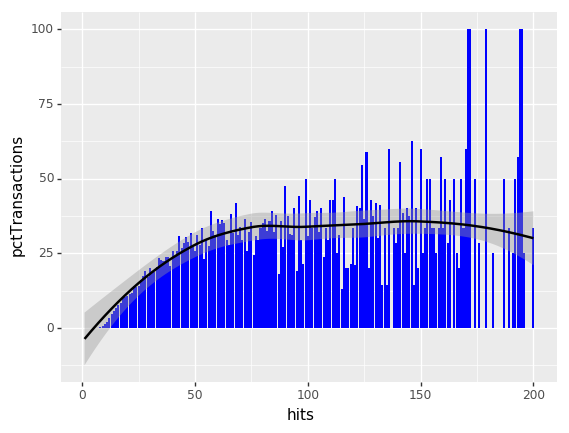

<ggplot: (-9223372029308015819)>

In [68]:
# above graph plotted using ggplot from plotnine library to see the smooth curve
ggplot(transaction_sum, aes(x='transaction_sum.index', y='pct_change')) +\
geom_bar(stat='identity', fill='blue') +\
geom_smooth() +\
labs(x="hits", y="pctTransactions")

In [70]:
new_train_df['ratioPageHits'] = new_train_df['totals.pageviews']/new_train_df['totals.hits']

In [71]:
pgviews = new_train_df[new_train_df['totals.pageviews'].notnull()]

In [72]:
pageviewsRev = pgviews.groupby(new_train_df['ratioPageHits']).sum()

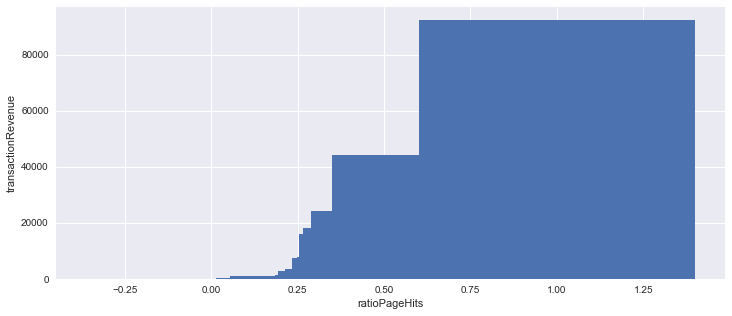

In [136]:
plt.figure(figsize=(12,5))
plt.bar(pageviewsRev.index, pageviewsRev['totals.transactionRevenue'])
plt.ylabel('transactionRevenue')
plt.xlabel('ratioPageHits')
plt.grid(True)
plt.show()

In [80]:
# function to set labels and breaks to plot using ggplot
def labels(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).apply(lambda x: '{:,}'.format(x)).tolist()
def breaks(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).tolist()

/Users/Dharu/anaconda3/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/Users/Dharu/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch clas

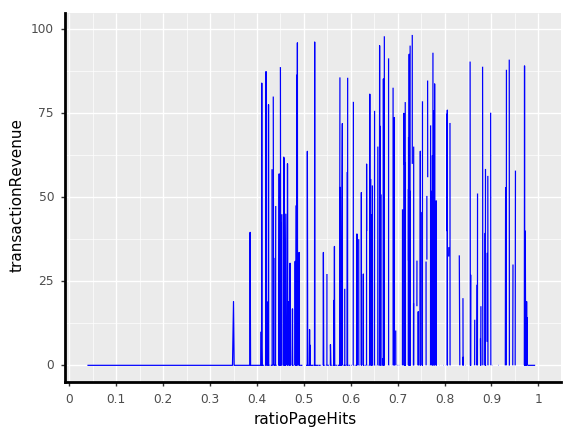

<ggplot: (-9223372029304021928)>

In [85]:
# above graph plotted using ggplot from plotnine library
p = ggplot(pageviewsRev, aes(x='pageviewsRev.index', y='totals.transactionRevenue')) +\
geom_line(stat='identity', color ='blue') +\
labs(x="ratioPageHits", y="transactionRevenue") +\
scale_x_continuous(
        breaks = breaks(0.0, 1.0, 0.1)
) +\
scale_y_continuous(
        limits = (0, 100),
        labels = labels(0, 100, 25),
        breaks = breaks(0, 100, 25)
    )

p + theme(
    axis_line=element_line(size=2),
    axis_text=element_text(margin={'t': 5, 'r': 5})
)

## 2.7 Sessions, revenues and transactions by country
The US really dwarf all other countries with regards to the number of sessions and the total revenues.

In [142]:
new_train_df['geoNetwork.country'] = new_train_df['geoNetwork.country'].astype('category')

In [143]:
new_train_df.groupby('geoNetwork.country')

In [144]:
NoOfSes = new_train_df.groupby('geoNetwork.country').count().sort_values(by='sessionId', ascending=True).tail(20)

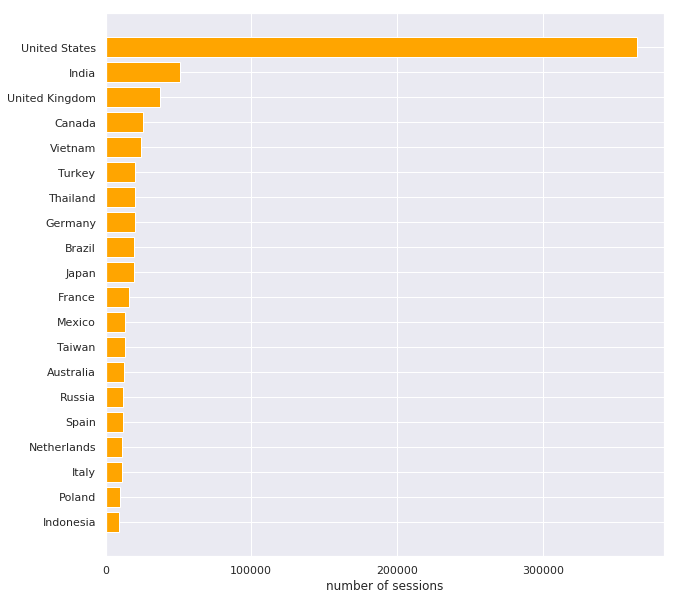

In [372]:
plt.figure(figsize=(10,10))
plt.barh(NoOfSes.index, NoOfSes['sessionId'], align = 'center', color = 'orange')
plt.xlabel('number of sessions')

plt.xticks(np.arange(0, 400000, 100000))

plt.grid(True)
plt.show()

In [146]:
Revenues = new_train_df.groupby('geoNetwork.country')['totals.transactionRevenue'].sum()

In [147]:
sortedRevenues = Revenues.sort_values(ascending=True).tail(20)

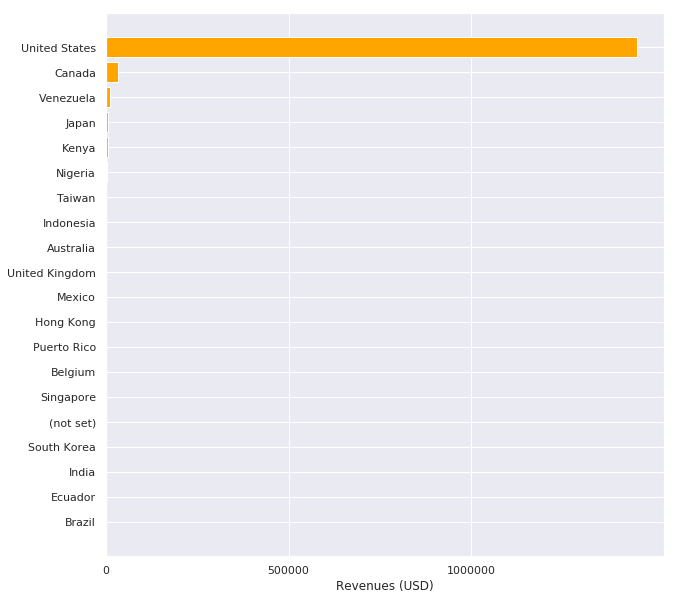

In [375]:
plt.figure(figsize=(10,10))
plt.barh(sortedRevenues.index, sortedRevenues, align = 'center', color = 'orange')

plt.xlabel('Revenues (USD)')

plt.xticks(np.arange(0, 1500000, 500000))

plt.grid(True)
plt.show()

Only 10 countries have at least 100 sessions and at least 10 transaction, and only 4 of those countries have mean revenues per session of more than 1 USD. Mean revenues per transaction vary between 79 and 395 USD. However, we must realize that of the 11,515 transactions, almost all come from the US (10,953).

In [154]:
new_train_df = new_train_df.rename(columns = {'totals.transactionRevenue':'transactionRevenue'})

In [157]:
new_train_df.loc[new_train_df.transactionRevenue > 0, 'transaction'] = 1
new_train_df.loc[new_train_df.transactionRevenue == 0, 'transaction'] = 0

In [158]:
new_train_df['transaction'] = new_train_df['transaction'].astype('int64')

In [159]:
country_stats_sum = new_train_df.groupby('geoNetwork.country').sum()

In [160]:
country_stats_count = new_train_df.groupby('geoNetwork.country').count()

In [161]:
country_info = pd.DataFrame(index=country_stats_sum.index)

In [163]:
country_info['Sessions'] = country_stats_count['sessionId']
country_info['Transactions'] = country_stats_sum['transaction']
country_info['totalRev'] = country_stats_sum['transactionRevenue']
country_info['sessionMean'] = country_info['totalRev']/country_info['Sessions']
country_info['transactionMean'] = country_info['totalRev']/country_info['Transactions']
country_info = country_info.sort_values(by='sessionMean', ascending=False)

In [164]:
countries_details = country_info[(country_info['Sessions']>100) & (country_info['Transactions']>10)]
countries_details.head(20)

,Sessions,Transactions,totalRev,sessionMean,transactionMean
geoNetwork.country,,,,,
Venezuela,2132,63,13374.90,6.273405,212.300000
United States,364744,10953,1452440.65,3.982082,132.606651
Puerto Rico,732,11,1202.84,1.643224,109.349091
Canada,25869,190,32824.54,1.268875,172.760737
Japan,19731,17,6728.99,0.341036,395.822941
Indonesia,9273,11,1840.38,0.198467,167.307273
Taiwan,12996,19,1920.89,0.147806,101.099474
Australia,12698,13,1745.26,0.137444,134.250769
Mexico,13225,20,1592.79,0.120438,79.639500


------------------------------------------------------------------------------------ End of EDA -----------------------------------------------------------------------------------